# 0. 데이터 불러오기

In [39]:
! kaggle datasets download -d rishikumarrajvansh/marketing-insights-for-e-commerce-company
! ls

Dataset URL: https://www.kaggle.com/datasets/rishikumarrajvansh/marketing-insights-for-e-commerce-company
License(s): other
marketing-insights-for-e-commerce-company.zip: Skipping, found more recently modified local copy (use --force to force download)
CustomersData.xlsx			       Marketing_Spend.csv  Tax_amount.xlsx
Discount_Coupon.csv			       Online_Sales.csv
marketing-insights-for-e-commerce-company.zip  sample_data


In [40]:
!unzip marketing-insights-for-e-commerce-company

Archive:  marketing-insights-for-e-commerce-company.zip
replace CustomersData.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [41]:
import pandas as pd
import numpy as np

sales_df = pd.read_csv('Online_Sales.csv')
sales_df.head(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used


In [42]:
customer_df = pd.read_excel('CustomersData.xlsx')
customer_df.head(3)

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33


In [43]:
# CustomerID를 기준으로 두 데이터프레임 합치기
df = pd.merge(sales_df, customer_df, on='CustomerID', how='inner')

# 분석에 필요한 칼럼만 남기고 칼럼명 변경하기
df = df[['Transaction_ID', 'Transaction_Date', 'CustomerID',  'Gender', 'Location', 'Tenure_Months', 'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges', 'Coupon_Status']]
df.columns = ['invoice_id', 'invoice_date', 'customer_id', 'gender', 'location', 'tenure', 'product_category', 'quantity', 'avg_price', 'delivery_charges', 'coupon']

In [44]:
df.head(5)

,invoice_id,invoice_date,customer_id,gender,location,tenure,product_category,quantity,avg_price,delivery_charges,coupon
0,16679,1/1/2019,17850,M,Chicago,12,Nest-USA,1,153.71,6.5,Used
1,16680,1/1/2019,17850,M,Chicago,12,Nest-USA,1,153.71,6.5,Used
2,16681,1/1/2019,17850,M,Chicago,12,Office,1,2.05,6.5,Used
3,16682,1/1/2019,17850,M,Chicago,12,Apparel,5,17.53,6.5,Not Used
4,16682,1/1/2019,17850,M,Chicago,12,Bags,1,16.50,6.5,Used


# 1. RFM 분석 연습 문제

### 1. 'invoice_date'를 'DD/MM/YYYY' 형식에서 'YYYY-MM-DD' 형식으로 변환하세요.
> 💡 **Hint** : datetime 라이브러리에서 문자열의 날짜 형식을 지정하는 함수를 활용해 보세요.

In [47]:
df['invoice_date'] = pd.to_datetime(df['invoice_date']).dt.strftime('%Y-%m-%d')
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df.head(3)

,invoice_id,invoice_date,customer_id,gender,location,tenure,product_category,quantity,avg_price,delivery_charges,coupon
0,16679,2019-01-01,17850,M,Chicago,12,Nest-USA,1,153.71,6.5,Used
1,16680,2019-01-01,17850,M,Chicago,12,Nest-USA,1,153.71,6.5,Used
2,16681,2019-01-01,17850,M,Chicago,12,Office,1,2.05,6.5,Used


### 2. 가장 최근 일자인 '2020-01-01'을 나타내는 'Now'라는 칼럼을 추가하세요.
> 💡 **Hint** : 문자열로 지정한 칼럼은 다시 datetime 형식으로 바꾸어야 합니다.

In [48]:
df['Now'] = pd.to_datetime("2020-01-01")
print(df)

       invoice_id invoice_date  customer_id gender    location  tenure  \
0           16679   2019-01-01        17850      M     Chicago      12   
1           16680   2019-01-01        17850      M     Chicago      12   
2           16681   2019-01-01        17850      M     Chicago      12   
3           16682   2019-01-01        17850      M     Chicago      12   
4           16682   2019-01-01        17850      M     Chicago      12   
...           ...          ...          ...    ...         ...     ...   
52919       48493   2019-12-31        14410      F    New York      45   
52920       48494   2019-12-31        14410      F    New York      45   
52921       48495   2019-12-31        14410      F    New York      45   
52922       48496   2019-12-31        14600      F  California       7   
52923       48497   2019-12-31        14600      F  California       7   

      product_category  quantity  avg_price  delivery_charges    coupon  \
0             Nest-USA         1    

### 3. 가장 최근 일자와 구매 일자 간의 차이를 나타내는 'Interval'이라는 칼럼을 추가하세요.

In [49]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%Y-%m-%d')
df["Interval"] = df["Now"] - df["invoice_date"]
print(df)

       invoice_id invoice_date  customer_id gender    location  tenure  \
0           16679   2019-01-01        17850      M     Chicago      12   
1           16680   2019-01-01        17850      M     Chicago      12   
2           16681   2019-01-01        17850      M     Chicago      12   
3           16682   2019-01-01        17850      M     Chicago      12   
4           16682   2019-01-01        17850      M     Chicago      12   
...           ...          ...          ...    ...         ...     ...   
52919       48493   2019-12-31        14410      F    New York      45   
52920       48494   2019-12-31        14410      F    New York      45   
52921       48495   2019-12-31        14410      F    New York      45   
52922       48496   2019-12-31        14600      F  California       7   
52923       48497   2019-12-31        14600      F  California       7   

      product_category  quantity  avg_price  delivery_charges    coupon  \
0             Nest-USA         1    

### 4. 총 구매 금액을 나타내는 'price'라는 칼럼을 추가하세요.
> 💡 **Hint** : 총 구매 금액은 평균 금액에 수량을 곱한 값으로 계산됩니다.

In [50]:
df['Price'] = df['avg_price'] * df['quantity']
print(df.head(5))

   invoice_id invoice_date  customer_id gender location  tenure  \
0       16679   2019-01-01        17850      M  Chicago      12   
1       16680   2019-01-01        17850      M  Chicago      12   
2       16681   2019-01-01        17850      M  Chicago      12   
3       16682   2019-01-01        17850      M  Chicago      12   
4       16682   2019-01-01        17850      M  Chicago      12   

  product_category  quantity  avg_price  delivery_charges    coupon  \
0         Nest-USA         1     153.71               6.5      Used   
1         Nest-USA         1     153.71               6.5      Used   
2           Office         1       2.05               6.5      Used   
3          Apparel         5      17.53               6.5  Not Used   
4             Bags         1      16.50               6.5      Used   

         Now Interval   Price  
0 2020-01-01 365 days  153.71  
1 2020-01-01 365 days  153.71  
2 2020-01-01 365 days    2.05  
3 2020-01-01 365 days   87.65  
4 2020-01-

### 5. RFM 분석을 위해 RFM_data 변수를 만들고 고객별 Recency, Frequency, Monetary를 구하세요.
> 💡 **Hint** : Interval에는 min(), ID에는 count(), price에는 sum()을 적용하고 열 이름을 변경해 보세요.

In [51]:
RFM_data = df.groupby('customer_id').agg({
    'Interval': 'min',
    'invoice_id': 'count',
    'Price': 'sum'
})

RFM_data.rename(columns={
    'Interval': 'Recency',
    'invoice_id': 'Frequency',
    'Price': 'Monetary'
}, inplace=True)

print(RFM_data.head())

             Recency  Frequency  Monetary
customer_id                              
12346       108 days          2     30.99
12347        60 days         60  13834.90
12348        74 days         23   1442.12
12350        18 days         17   1360.07
12356       108 days         36   1442.47


### 6. 'Recency' 칼럼의 값을 숫자로 변경하세요.
> 💡 **Hint** : datetime 라이브러리의 일자를 추출하는 함수가 무엇인지 생각해 보세요.

In [52]:
RFM_data['Recency'] = RFM_data['Recency'].dt.days
RFM_data.head(3)

,Recency,Frequency,Monetary
customer_id,,,
12346,108,2,30.99
12347,60,60,13834.90
12348,74,23,1442.12


### 7. RFM_data의 전반적인 기술통계량을 확인하세요.
> 💡 **Hint** : 기술통계량과 전치 함수를 모두 활용해 보세요.

In [53]:
RFM_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,1468.0,145.292234,101.936959,1.0,56.0000,132.00,221.0000,365.00
Frequency,1468.0,36.051771,50.885680,1.0,10.0000,21.00,46.0000,695.00
Monetary,1468.0,3181.740204,5065.804553,1.0,652.4125,1750.41,3917.8875,75937.55


### 8. Recency, Frequency, Monetary 칼럼의 값들을 히스토그램과 상자그림으로 시각화 해보세요.
> 💡 **Hint** : 서브플롯을 활용해서 각 칼럼의 히스토그램과 상자그림을 한 번에 출력해 보세요.

<ipython-input-54-5dedaa73cf21>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, horizontalalignment='right') # Rotate x-axis labels for better readability
<ipython-input-54-5dedaa73cf21>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, horizontalalignment='right')
<ipython-input-54-5dedaa73cf21>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45, horizontalalignment='right')


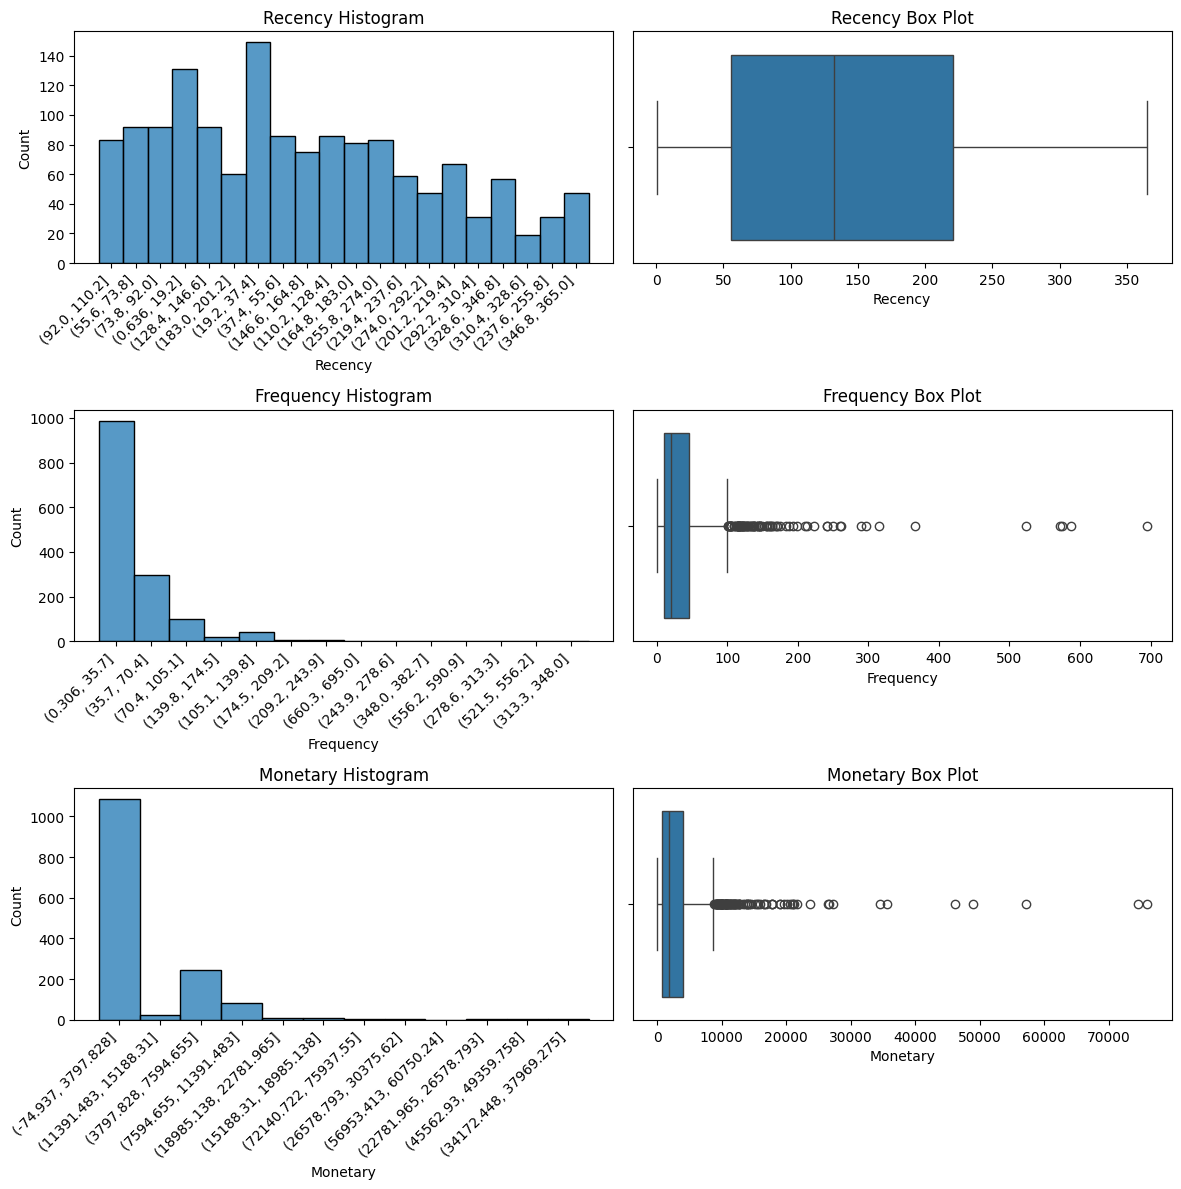

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Recency
# Using pd.cut to create bins and then plotting with values instead of the interval objects
recency_bins = pd.cut(RFM_data['Recency'], bins=20)  # Create 20 bins
sns.histplot(recency_bins.astype(str), ax=axes[0, 0]) # Plot using string representation of bins
axes[0, 0].set_title('Recency Histogram')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, horizontalalignment='right') # Rotate x-axis labels for better readability
sns.boxplot(x='Recency', data=RFM_data, ax=axes[0, 1])
axes[0, 1].set_title('Recency Box Plot')

# Frequency
# Same approach for Frequency
frequency_bins = pd.cut(RFM_data['Frequency'], bins=20)
sns.histplot(frequency_bins.astype(str), ax=axes[1, 0])
axes[1, 0].set_title('Frequency Histogram')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, horizontalalignment='right')
sns.boxplot(x='Frequency', data=RFM_data, ax=axes[1, 1])
axes[1, 1].set_title('Frequency Box Plot')

# Monetary
# Same approach for Monetary
monetary_bins = pd.cut(RFM_data['Monetary'], bins=20)
sns.histplot(monetary_bins.astype(str), ax=axes[2, 0])
axes[2, 0].set_title('Monetary Histogram')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45, horizontalalignment='right')
sns.boxplot(x='Monetary', data=RFM_data, ax=axes[2, 1])
axes[2, 1].set_title('Monetary Box Plot')

plt.tight_layout()  # subplot 간 간격 조정
plt.show()

> * 데이터를 살핀 결과, Frequency와 Monetary 열에는 이상치가 있는 것으로 확인됩니다.  
* 이러한 이상치는 후에 R_score, F_score, M_score를 만들 때 정규화에 부정적인 영향을 줄 수 있습니다.  
* Frequency와 Monetary 열에 대하여 사분위수를 기준으로 이상치를 제거해 봅시다.

In [55]:
# Frequency 열의 이상치 경계 계산
Q1_F = RFM_data['Frequency'].quantile(0.25)
Q3_F = RFM_data['Frequency'].quantile(0.75)
IQR_F = Q3_F - Q1_F
lower_bound_F = Q1_F - 1.5 * IQR_F
upper_bound_F = Q3_F + 1.5 * IQR_F

# Monetary 열의 이상치 경계 계산
Q1_M = RFM_data['Monetary'].quantile(0.25)
Q3_M = RFM_data['Monetary'].quantile(0.75)
IQR_M = Q3_M - Q1_M
lower_bound_M = Q1_M - 1.5 * IQR_M
upper_bound_M = Q3_M + 1.5 * IQR_M

# Frequency 열에서 이상치 제거
RFM_data = RFM_data[(RFM_data['Frequency'] >= lower_bound_F) & (RFM_data['Frequency'] <= upper_bound_F)]

# Monetary 열에서 이상치 제거
RFM_data = RFM_data[(RFM_data['Monetary'] >= lower_bound_M) & (RFM_data['Monetary'] <= upper_bound_M)]

### 9. Frequency 칼럼에 대하여 1.5 * IQR(Q3 - Q1)을 기준으로 lower_bound, upper_bound를 설정하세요.
> 💡 **Hint** : Q1(25%)과 Q3(75%)와 같이 분위수를 구하는 함수가 무엇인지 생각해 보세요.

In [56]:
# Frequency 열의 이상치 경계 계산
Q1_F = RFM_data['Frequency'].quantile(0.25)
Q3_F = RFM_data['Frequency'].quantile(0.75)
IQR_F = Q3_F - Q1_F
lower_bound_F = Q1_F - 1.5 * IQR_F
upper_bound_F = Q3_F + 1.5 * IQR_F

print(f"lower_bound_F: {lower_bound_F}")
print(f"upper_bound_F: {upper_bound_F}")

lower_bound_F: -34.5
upper_bound_F: 81.5


### 10. Frequency 칼럼의 값이 lower_bound와 upper_bound를 벗어나는 값을 제거하세요.
> 💡 **Hint** : Frequency는 lower_bound 보다는 크거나 같고 upper_bound보다는 작거나 같아야 합니다.

In [57]:
RFM_data = RFM_data[(RFM_data['Frequency'] >= lower_bound_F) & (RFM_data['Frequency'] <= upper_bound_F)]


### 11. Monetary 열에 대해서도 같은 과정으로 이상치를 제거해 보세요.

In [58]:
Q1_M = RFM_data['Monetary'].quantile(0.25)
Q3_M = RFM_data['Monetary'].quantile(0.75)
IQR_M = Q3_M - Q1_M
lower_bound_M = Q1_M - 1.5 * IQR_M
upper_bound_M = Q3_M + 1.5 * IQR_M

RFM_data = RFM_data[(RFM_data['Monetary'] >= lower_bound_M) & (RFM_data['Monetary'] <= upper_bound_M)]


### 12. 이상치가 제거된 RFM_data의 Frequency, Monetary에 대하여 다시 히스토그램과 상자그림을 그려보세요.

<ipython-input-59-0f4587268031>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right') # Rotate x-axis labels


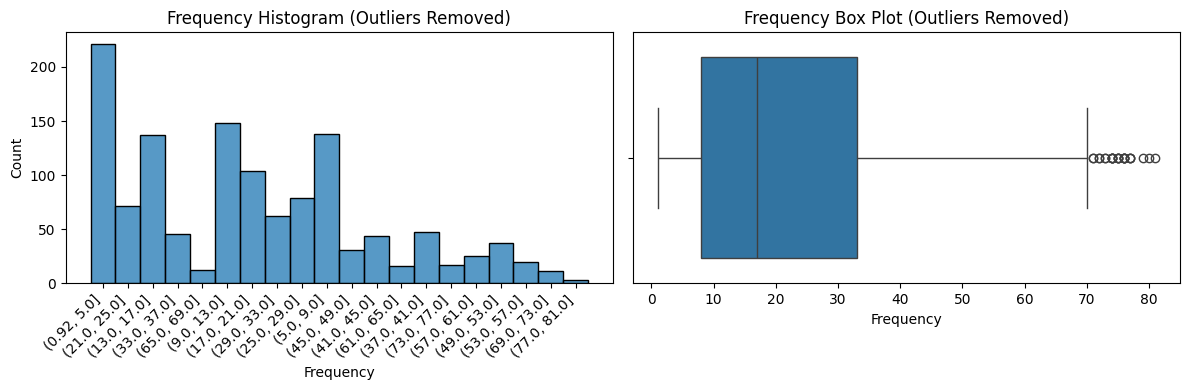

<ipython-input-59-0f4587268031>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')


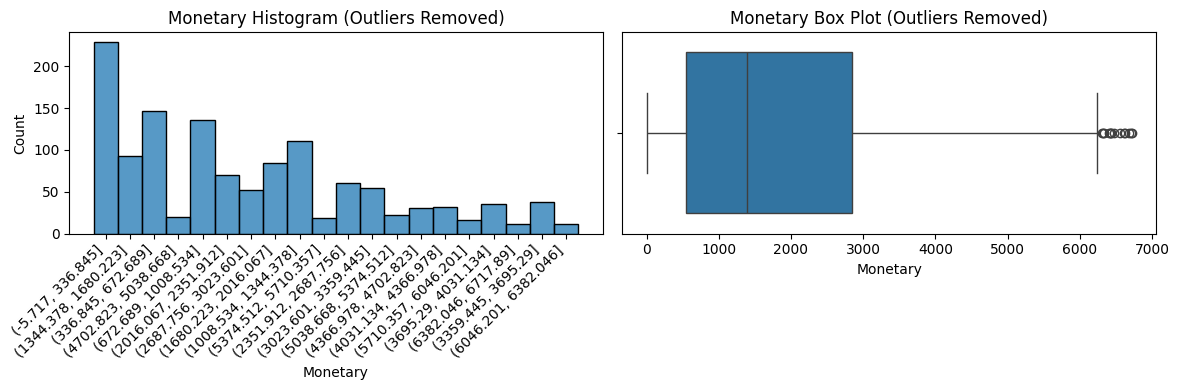

In [59]:
# Frequency
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

frequency_bins = pd.cut(RFM_data['Frequency'], bins=20)  # Create 20 bins
sns.histplot(frequency_bins.astype(str), ax=axes[0])  # Plot using string representation of bins
axes[0].set_title('Frequency Histogram (Outliers Removed)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right') # Rotate x-axis labels

sns.boxplot(x='Frequency', data=RFM_data, ax=axes[1])
axes[1].set_title('Frequency Box Plot (Outliers Removed)')

plt.tight_layout()
plt.show()

# Monetary
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

monetary_bins = pd.cut(RFM_data['Monetary'], bins=20)
sns.histplot(monetary_bins.astype(str), ax=axes[0])
axes[0].set_title('Monetary Histogram (Outliers Removed)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')

sns.boxplot(x='Monetary', data=RFM_data, ax=axes[1])
axes[1].set_title('Monetary Box Plot (Outliers Removed)')

plt.tight_layout()
plt.show()

### 13. RFM_data의 각 칼럼값에 대하여 이전 수업처럼 R_score, F_score, M_score를 구하세요.
> 💡 **Hint** : 각각의 score는 각 칼럼에 대하여 1부터 100까지의 실수로 정규화한 값입니다.

In [60]:
def normalize(column):
    min = column.min()
    max = column.max()
    normalized_column = (column - min) / (max - min) * 100
    return normalized_column

RFM_data['R_score'] = normalize(RFM_data['Recency'])
RFM_data['F_score'] = normalize(RFM_data['Frequency'])
RFM_data['M_score'] = normalize(RFM_data['Monetary'])

print(RFM_data.head())

             Recency  Frequency  Monetary    R_score  F_score    M_score
customer_id                                                             
12346            108          2     30.99  29.395604     1.25   0.446486
12348             74         23   1442.12  20.054945    27.50  21.455167
12350             18         17   1360.07   4.670330    20.00  20.233620
12356            108         36   1442.47  29.395604    43.75  21.460378
12359            131         16    601.81  35.714286    18.75   8.944765


### 14. 각 score에 대하여 산술평균한 값을 나타내는 'RFM_score'라는 칼럼을 추가하세요. (소수점 셋째자리에서 반올림)

In [61]:
RFM_data['RFM_score'] = round(((RFM_data['R_score'] + RFM_data['F_score'] + RFM_data['M_score']) / 3), 3)
print(RFM_data.head())

             Recency  Frequency  Monetary    R_score  F_score    M_score  \
customer_id                                                                
12346            108          2     30.99  29.395604     1.25   0.446486   
12348             74         23   1442.12  20.054945    27.50  21.455167   
12350             18         17   1360.07   4.670330    20.00  20.233620   
12356            108         36   1442.47  29.395604    43.75  21.460378   
12359            131         16    601.81  35.714286    18.75   8.944765   

             RFM_score  
customer_id             
12346           10.364  
12348           23.003  
12350           14.968  
12356           31.535  
12359           21.136  


### 15. RFM_score를 아래의 분위값에 따라 5개의 class로 구분하는 'Class'라는 칼럼을 추가하고 인덱스를 초기화 하세요.
> ✔️ 전체의 40% 👉 5등급, 25% 👉 4등급, 20% 👉 3등급, 14% 👉 2등급, 1% 👉 1등급  
>💡 **Hint** : 특정 분위값에 따라 구간을 나누는 함수가 무엇인지 생각해 보세요.

In [62]:
quantiles = RFM_data['RFM_score'].quantile([0.01, 0.15, 0.35, 0.60])

RFM_data['Class'] = 5
RFM_data.loc[RFM_data['RFM_score'] <= quantiles[0.01], 'Class'] = 1
RFM_data.loc[(RFM_data['RFM_score'] > quantiles[0.01]) & (RFM_data['RFM_score'] <= quantiles[0.15]), 'Class'] = 2
RFM_data.loc[(RFM_data['RFM_score'] > quantiles[0.15]) & (RFM_data['RFM_score'] <= quantiles[0.35]), 'Class'] = 3
RFM_data.loc[(RFM_data['RFM_score'] > quantiles[0.35]) & (RFM_data['RFM_score'] <= quantiles[0.60]), 'Class'] = 4

RFM_data = RFM_data.reset_index()

print(RFM_data.head())


   customer_id  Recency  Frequency  Monetary    R_score  F_score    M_score  \
0        12346      108          2     30.99  29.395604     1.25   0.446486   
1        12348       74         23   1442.12  20.054945    27.50  21.455167   
2        12350       18         17   1360.07   4.670330    20.00  20.233620   
3        12356      108         36   1442.47  29.395604    43.75  21.460378   
4        12359      131         16    601.81  35.714286    18.75   8.944765   

   RFM_score  Class  
0     10.364      2  
1     23.003      3  
2     14.968      2  
3     31.535      4  
4     21.136      3  


### 16. R_score와 M_score를 기준으로 Class별 분포를 확인하기 위해 산포도를 그려보세요.

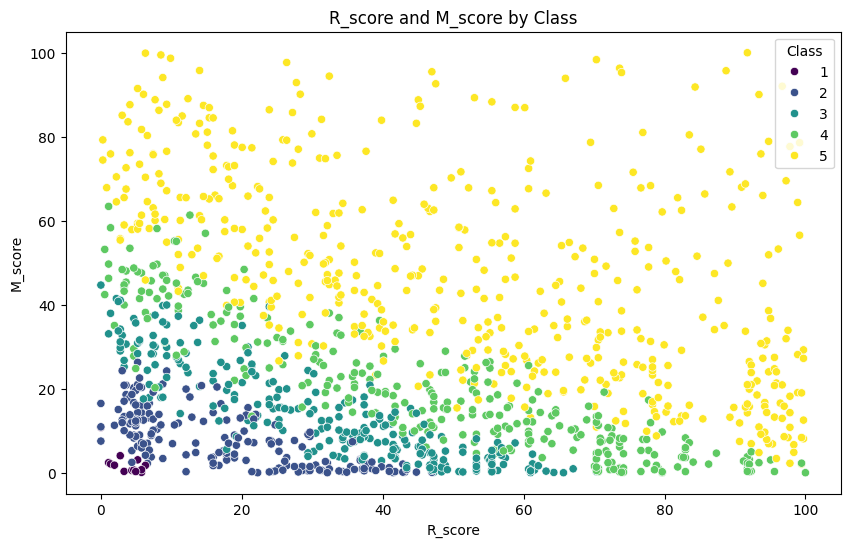

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='R_score', y='M_score', hue='Class', data=RFM_data, palette="viridis")
plt.title('R_score and M_score by Class')
plt.xlabel('R_score')
plt.ylabel('M_score')
plt.show()


### 17. Class별로 몇 명의 고객이 있는지 다양한 그래프를 통해 확인하세요.
> 💡 **Hint** : 범주형 변수의 빈도를 확인하기 위한 그래프에는 무엇이 있는지 생각해 보세요.

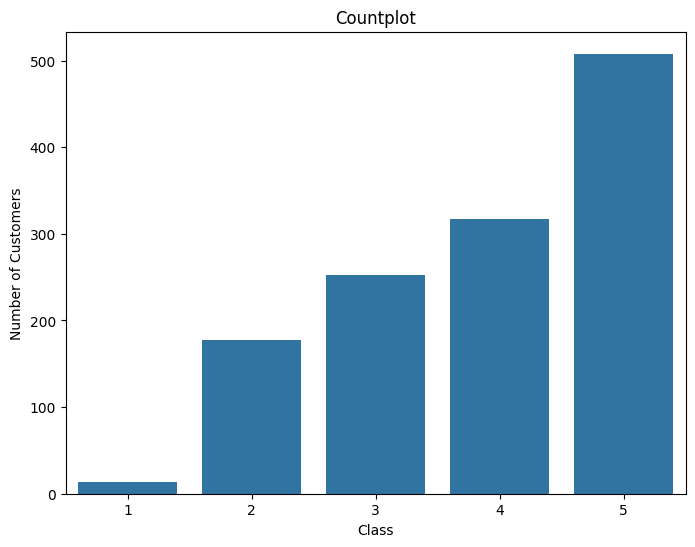

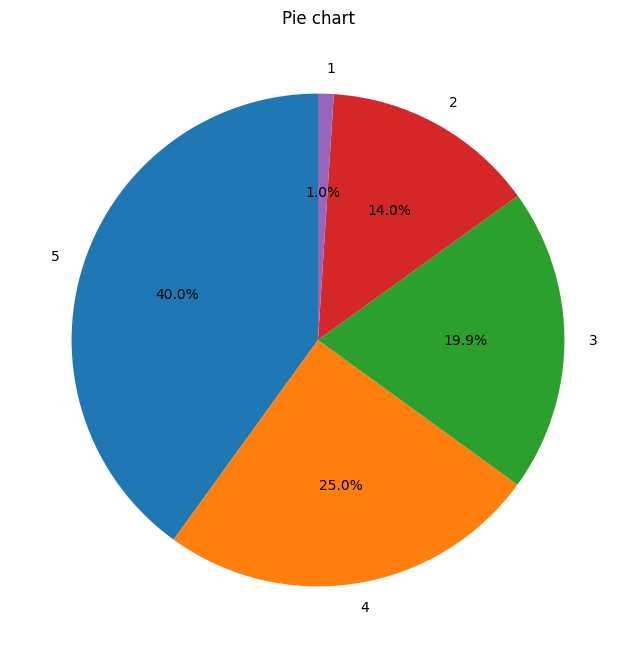

In [64]:
# Class별 고객 수 확인 (Countplot)
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=RFM_data)
plt.title('Countplot')
plt.xlabel('Class')
plt.ylabel('Number of Customers')
plt.show()

# Class별 고객 수 확인 (Pie chart)
class_counts = RFM_data['Class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie chart')
plt.show()


# 2. Decision Tree를 이용한 군집 분석 이해하기

> 아래 코드는 Decision Tree를 이해하기 위한 단계별 설명입니다. 위 연습문제 섹션에서 정제한 df 데이터프레임을 활용했습니다.  
> 직접 내용을 채울 수 있도록 노력해 보세요. 어렵다면 예시 답변을 참고하시면 됩니다.

### 1. 아래의 변수 목록을 참고하여 분석에 필요한 변수만으로 df2라는 새로운 데이터프레임을 정의하세요.  
> 🌳 **사용할 변수** : gender, location, tenure, product_category, delivery_charges, coupon, price

In [65]:
df2 = df[['gender', 'location', 'tenure', 'product_category', 'delivery_charges', 'coupon', 'Price']]
df2.head(5)

,gender,location,tenure,product_category,delivery_charges,coupon,Price
0,M,Chicago,12,Nest-USA,6.5,Used,153.71
1,M,Chicago,12,Nest-USA,6.5,Used,153.71
2,M,Chicago,12,Office,6.5,Used,2.05
3,M,Chicago,12,Apparel,6.5,Not Used,87.65
4,M,Chicago,12,Bags,6.5,Used,16.50


In [66]:
df.columns

Index(['invoice_id', 'invoice_date', 'customer_id', 'gender', 'location',
       'tenure', 'product_category', 'quantity', 'avg_price',
       'delivery_charges', 'coupon', 'Now', 'Interval', 'Price'],
      dtype='object')

### 2. df2 내에 존재하는 범주형 변수들에 대하여 'category'로 데이터 타입을 변경하세요.
> 💡 **Hint** : for문과 데이터 타입을 변경하는 함수를 모두 활용해 보세요.

In [67]:
categorical_features = ["gender", "location", "product_category", "coupon"]

for col in categorical_features:
    df2[col] = df2[col].astype("category")

<ipython-input-67-fc380b9ee34a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = df2[col].astype("category")
<ipython-input-67-fc380b9ee34a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = df2[col].astype("category")
<ipython-input-67-fc380b9ee34a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

### 3. 'price' 칼럼을 제외한 모든 변수를 X에, 'price'를 Y라는 변수에 할당하세요.

In [68]:
categorical_features

['gender', 'location', 'product_category', 'coupon']

In [69]:
# for문 사용하면 메모리 낭비됨
# axis 사용 -> 효율적!

y = df2['Price']
X = df2.drop('Price', axis=1)

print("X")
print(X)
print("\ny")
print(y)

X
      gender    location  tenure product_category  delivery_charges    coupon
0          M     Chicago      12         Nest-USA              6.50      Used
1          M     Chicago      12         Nest-USA              6.50      Used
2          M     Chicago      12           Office              6.50      Used
3          M     Chicago      12          Apparel              6.50  Not Used
4          M     Chicago      12             Bags              6.50      Used
...      ...         ...     ...              ...               ...       ...
52919      F    New York      45         Nest-USA              6.50   Clicked
52920      F    New York      45          Apparel              6.50      Used
52921      F    New York      45         Nest-USA              6.50      Used
52922      F  California       7         Nest-USA              6.50   Clicked
52923      F  California       7         Nest-USA             19.99   Clicked

[52924 rows x 6 columns]

y
0        153.71
1        153.71
2

### 4. Decision Tree 기반의 알고리즘인 LightGBM을 활용하기 위한 패키지를 불러오세요.
> 🌳 지금부터는 아래의 코드를 그대로 실행하시면 됩니다.

In [70]:
import numpy as np
import lightgbm as lgb
from lightgbm import early_stopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### 5. 학습을 위해 X, y 데이터를 train : test = 0.8 : 0.2의 비율로 나누세요.
> 🌳 모델을 만들 때는 모델이 정답을 익히는 데에 사용하는 train 데이터와 배운대로 정답을 잘 맞추는지 확인하는 test 데이터가 필요합니다.  
> 🌳 일반적으로 train : test의 비율은 0.7 : 0.3 ~ 0.8 : 0.2의 비율로 나누어지며, 데이터의 특성에 따라 비율은 변할 수 있습니다.  
> 🌳 코드를 실행할 때마다 분할 결과가 달라지는 것을 막기 위해 random_state 옵션을 지정합니다.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. LightGBM이 이 데이터를 이해할 수 있도록 X_train, X_test 데이터를 LightGBM 데이터셋 형식으로 바꾸세요.
> 🌳 일반적인 데이터 시각화 과정과 달리 모델을 학습하는 과정에서는 사용하는 모델의 종류에 따라 모델이 이해할 수 있는 방식으로 데이터를 바꾸어주는 과정이 필요합니다.

In [72]:
lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features, free_raw_data=False)
lgb_test = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_features, free_raw_data=False)

### 7. 모델이 학습할 Tree의 구조를 정의하는 파라미터를 적절하게 지정하세요.
> 🌳 objective (분석의 목적) : regression / classification (정답이 연속형 or 범주형)  
> 🌳 num_leaves (마지막 잎의 데이터 수) : 기본값은 31 (커질수록 더 풍성한 Tree 생성)  
> 🌳 max_depth (트리의 깊이) : 트리의 최대 깊이 (-1로 지정할 경우 깊이 제한 없음)

In [73]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": 10,
    "verbose": -1
}

### 8. LightGBM 모델을 학습하세요.

In [74]:
model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_test],
    valid_names=["train", "test"],
    callbacks=[early_stopping(stopping_rounds=10)])

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	train's rmse: 134.613	test's rmse: 160.786


### 9. 만들어진 트리의 구조를 시각화 하세요.

> 🌳 LightGBM 외에도 **Decision Tree** 기반의 다양한 모델에서 Tree 구조를 시각화할 때에는 **plot_tree()** 함수를 사용합니다.  
🌳 모델별로 plot_tree() 함수에 지정할 수 있는 옵션이 다양하니 다른 분석에 이용 시, 참고하세요.

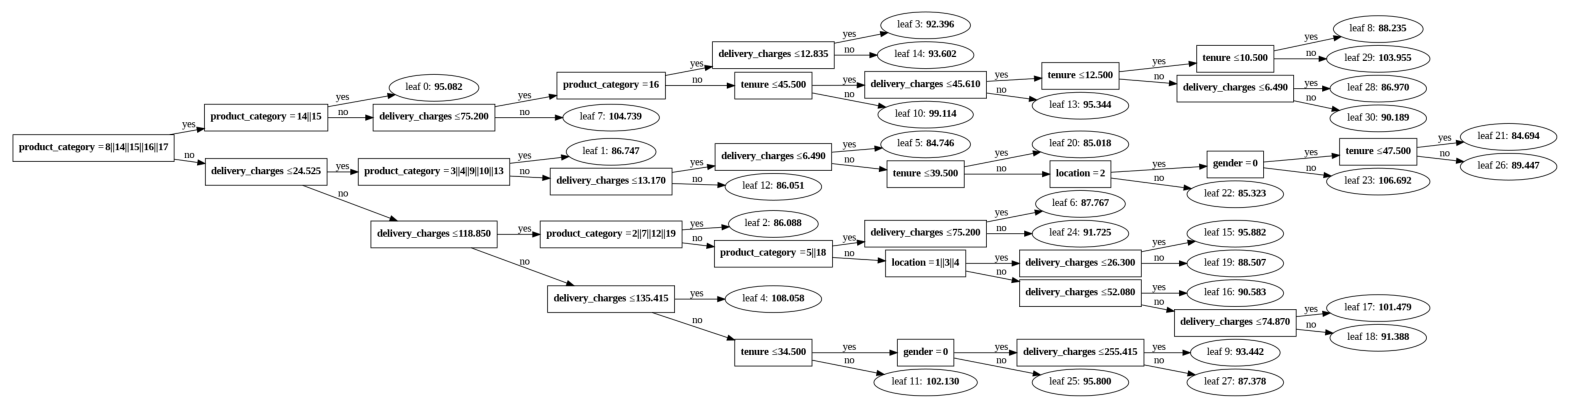

In [75]:
lgb.plot_tree(model,tree_index=0, figsize=(20, 10))
plt.show()

### 10. 인코딩된 'product_category' 칼럼의 원래 값들을 확인하세요.
> 🌳 만들어진 Tree는 범주형 변수에 대해 자동으로 인코딩을 합니다. (문자 👉 숫자)  
> 🌳 고유값을 기준으로 인코딩 되므로 for문을 적절히 활용하여 원래의 값을 확인해 보세요.

In [76]:
unique_categories = df2['product_category'].astype('category').cat.categories
for i, category in enumerate(unique_categories):
    print(f"{i}: {category}")

0: Accessories
1: Android
2: Apparel
3: Backpacks
4: Bags
5: Bottles
6: Drinkware
7: Fun
8: Gift Cards
9: Google
10: Headgear
11: Housewares
12: Lifestyle
13: More Bags
14: Nest
15: Nest-Canada
16: Nest-USA
17: Notebooks & Journals
18: Office
19: Waze


### 🌳 분석 결과
> - 구매 금액을 구분하는 가장 큰 두 개의 기준은 **product_category**와 **delivery_charges**다.
> - 상품 카테고리 : 대부분 **기프트 카드**나 **'Nest(구글의 스마트 홈 기기)'**처럼 전자 관련 제품 여부를 전기준으로 구매군이 나누어진다.
> - 배송비 : **24.525(한화 약 3만원)달러**를 기준으로 구매군이 나누어진다.
> - 향후 구매 당 총 구매 금액에 따라 고객을 분석한다면, 전자기기 등 고가의 상품을 구매한 집단과 그렇지 않은 집단, 혹은 배송비를 약 25달러 이상 내는 집단과 그렇지 않은 집단 등으로 나누어 분석하면 도움이 될 것이다.

# 3. Decision Tree를 이용한 군집 분석 직접 해보기

> 🌳 위의 실습 내용을 참고하여 각자 분석 목표를 설정하고, 그에 맞게 X, y 변수를 지정하여 Decision Tree를 만들어 분석을 진행하세요.

In [77]:
# 원본 df를 복사해 처음부터 분석 목표에 맞게 데이터를 정제해 사용하세요.
df3 = df.copy()

# 고윳값 확인
unique_values = df3['coupon'].unique()
print(unique_values)

['Used' 'Not Used' 'Clicked']


In [78]:
df3 = df3[['gender', 'location', 'tenure', 'product_category','delivery_charges', 'coupon']]
df3

,gender,location,tenure,product_category,delivery_charges,coupon
0,M,Chicago,12,Nest-USA,6.50,Used
1,M,Chicago,12,Nest-USA,6.50,Used
2,M,Chicago,12,Office,6.50,Used
3,M,Chicago,12,Apparel,6.50,Not Used
4,M,Chicago,12,Bags,6.50,Used
...,...,...,...,...,...,...
52919,F,New York,45,Nest-USA,6.50,Clicked
52920,F,New York,45,Apparel,6.50,Used
52921,F,New York,45,Nest-USA,6.50,Used
52922,F,California,7,Nest-USA,6.50,Clicked


<ipython-input-85-ed76813015d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['coupon'] = df2['coupon'].replace({'Used': 1, 'Clicked': 1, 'Not Used': 0})
<ipython-input-85-ed76813015d0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['coupon'] = df2['coupon'].astype(int)


0        1
1        1
2        1
3        0
4        1
        ..
52919    1
52920    1
52921    1
52922    1
52923    1
Name: coupon, Length: 52924, dtype: int64
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	train's binary_logloss: 0.430087	test's binary_logloss: 0.417875


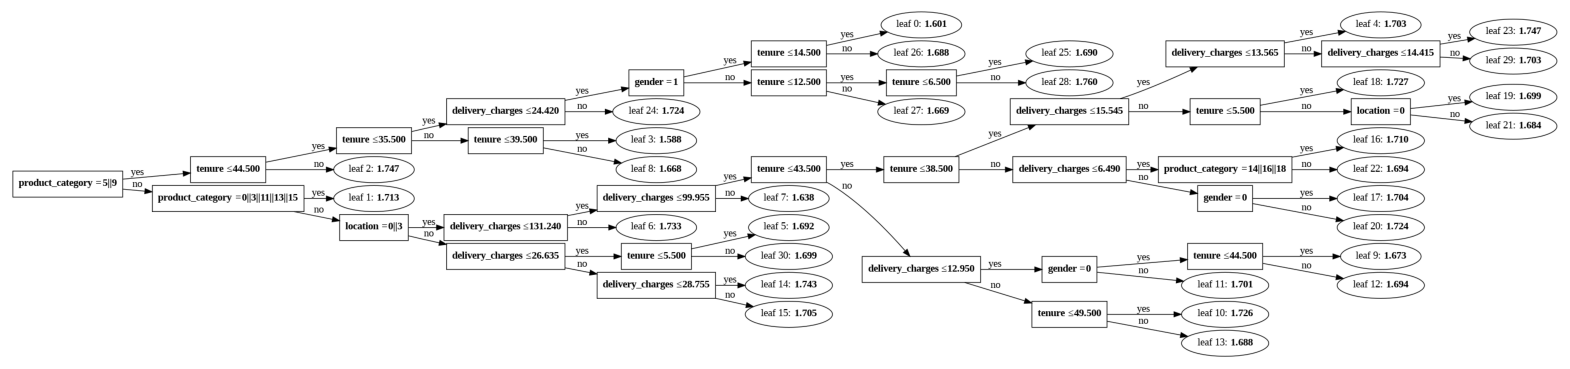

In [85]:
# df2.head()

# 범주형변수 타입 변경
categorical_features = ['gender', 'location', 'product_category', 'coupon']
for col in categorical_features:
    df[col] = df2[col].astype('category')

# 쿠폰사용여부 0,1로 변경
df2['coupon'] = df2['coupon'].replace({'Used': 1, 'Clicked': 1, 'Not Used': 0})
# df2.head()

df2['coupon'] = df2['coupon'].astype(int)
print(df2['coupon'])

# X, y 변수 할당
X = df2[['gender', 'location', 'tenure', 'product_category', 'delivery_charges']]
y = df2['coupon']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 데이터셋으로 변환
lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features[:-1], free_raw_data=False)
lgb_test = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_features[:-1], free_raw_data=False)

# 모델 파라미터 설정
params = {
    "objective": "binary",  # 이진 분류 문제
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": 10,
    "verbose": -1
}

# 모델 학습
model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_test],
    valid_names=["train", "test"],
    callbacks=[early_stopping(stopping_rounds=10)])

# 트리 시각화
lgb.plot_tree(model, tree_index=0, figsize=(20, 10))
plt.show()